In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

In [2]:
# Retrieve data from database, in the form of buckets
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7a8a4663a84447739c0c549272dbf3b6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='USf4tJM5TmWX_ayvsXgYGeGp0DYF9z2F00MSHEDIgUlx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_7a8a4663a84447739c0c549272dbf3b6.get_object(Bucket='breastcancerriskprediction-donotdelete-pr-xx7j0jmthyqptf',Key='Breast_cancer_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)



In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [5]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
df.columns.values

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'], dtype=object)

In [7]:
df.info

<bound method DataFrame.info of      mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89  

In [8]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

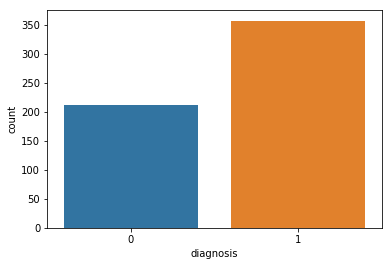

In [9]:
sns.countplot(x='diagnosis',data=df)

In [10]:
y = df['diagnosis']

In [11]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'}) # converting the data into categorical

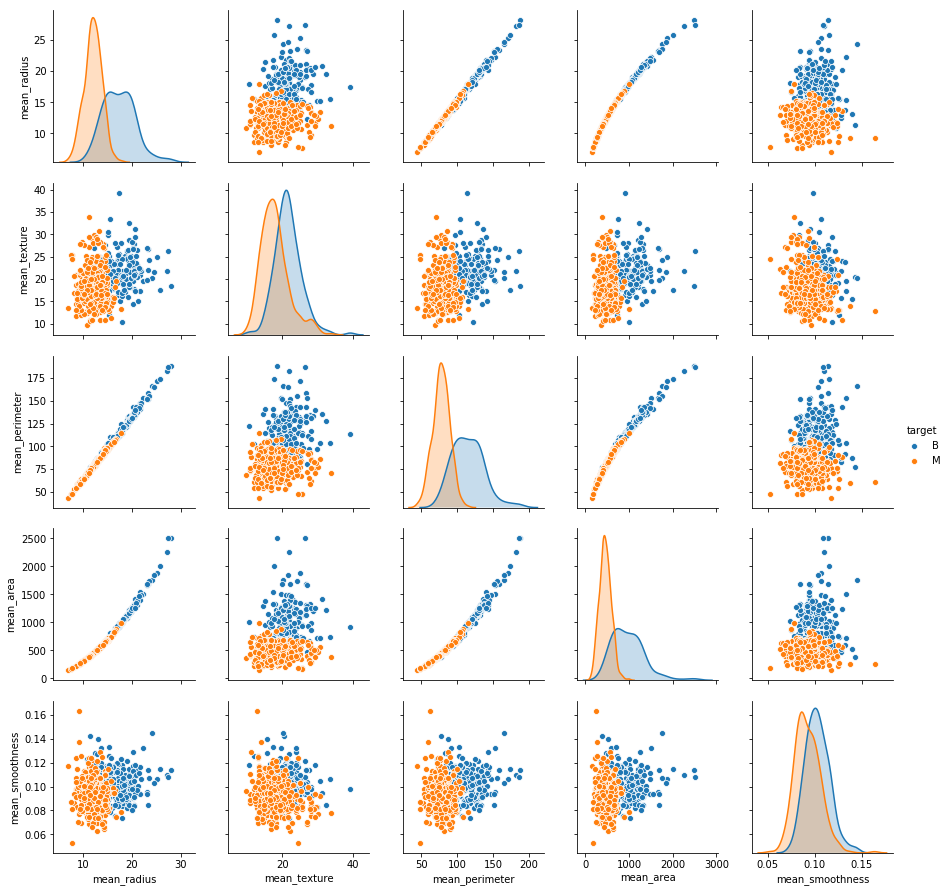

In [12]:
sns.pairplot(df.drop('diagnosis', axis = 1), hue="target")

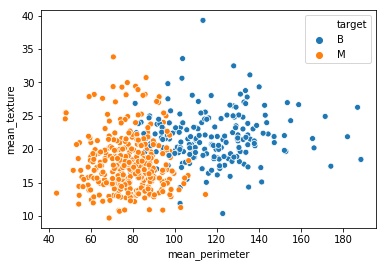

In [13]:
# mean_perimeter and mean_texture seem to be most relevant
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data = df, hue = 'target') 

In [14]:
X = df.drop(['target','diagnosis'], axis = 1)

In [15]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [16]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X_train.shape

(398, 5)

In [40]:
y_train

149    1
124    1
421    1
195    1
545    1
261    0
227    1
399    1
453    1
523    1
410    1
114    1
141    0
498    0
7      0
541    1
19     1
172    0
407    1
56     0
497    1
301    1
550    1
289    1
277    0
49     1
234    1
25     0
398    1
311    1
      ..
510    1
58     1
474    1
252    0
21     1
313    1
459    1
160    1
276    1
191    1
385    0
413    1
491    1
343    0
308    1
130    1
99     0
372    0
87     0
458    1
330    0
214    0
466    1
121    0
20     1
71     1
106    1
270    1
435    0
102    1
Name: diagnosis, Length: 398, dtype: int64

In [41]:
y_test

204    1
70     0
131    0
431    1
540    1
567    0
369    0
29     0
81     1
477    1
457    1
167    0
165    1
329    0
527    1
83     0
511    1
556    1
101    1
535    0
73     0
394    1
393    0
425    1
305    1
76     1
384    1
555    1
362    1
72     0
      ..
18     0
390    1
287    1
512    0
402    1
446    0
210    0
184    0
442    1
54     0
404    1
46     1
93     1
231    1
108    0
244    0
568    1
434    1
428    1
192    1
341    1
185    1
355    1
414    0
426    1
69     1
542    1
176    1
501    0
247    1
Name: diagnosis, Length: 171, dtype: int64

In [42]:
X_train

array([[-0.12348985, -0.29680142, -0.17050713, -0.20861569, -1.2016799 ],
       [-0.22826757, -0.65795149, -0.25377521, -0.2965028 , -1.80463697],
       [ 0.14553402, -1.23056444,  0.24583328, -0.01024193,  0.5191843 ],
       ...,
       [ 0.03226081, -0.55578404, -0.08064356, -0.0758085 , -2.30358576],
       [-0.05552593,  0.10949242, -0.04684166, -0.16815972,  0.73011017],
       [-0.56525537,  0.32333128, -0.619825  , -0.56100116, -1.15149409]])

In [43]:
X_test

array([[-4.83132293e-01, -1.32858288e-01, -4.60296543e-01,
        -4.96271601e-01,  2.68255241e-01],
       [ 1.34906186e+00,  5.11034285e-01,  1.29204314e+00,
         1.31197082e+00, -4.27072812e-01],
       [ 3.63584944e-01,  7.62285993e-02,  3.89285221e-01,
         2.48676288e-01,  9.62855964e-01],
       [-5.02955104e-01, -3.51449124e-01, -4.44632250e-01,
        -5.35611545e-01,  6.86470336e-01],
       [-7.46492503e-01, -1.12126903e+00, -7.25765081e-01,
        -7.16686894e-01,  2.82074523e-01],
       [ 1.81914568e+00,  2.41657614e+00,  1.97220321e+00,
         1.68862987e+00,  1.58836028e+00],
       [ 2.21843374e+00,  6.51217539e-01,  2.26487815e+00,
         2.29407441e+00,  7.51930090e-01],
       [ 9.61101120e-01, -9.76333798e-01,  9.37535462e-01,
         8.23988103e-01,  1.82430230e-01],
       [-2.36763064e-01, -7.83878822e-01, -2.37698701e-01,
        -3.89970048e-01,  8.61029680e-01],
       [-7.81805711e-02, -6.03303784e-01, -1.35468581e-01,
        -1.68438728e-01

In [17]:
# XGBoost Classifier

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [18]:
y_pred = xgb.predict(X_test)

In [19]:
# Accuracy
xgb.score(X_test,y_test)

0.9649122807017544

In [20]:
# Model Evaluation

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [22]:
print(accuracy_score(y_test,y_pred))

0.9649122807017544


In [23]:
print(confusion_matrix(y_test, y_pred))

[[ 61   2]
 [  4 104]]


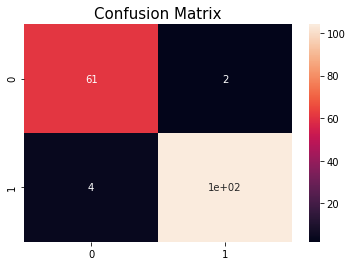

In [24]:

plt.title('Confusion Matrix',fontsize=15)
sns.heatmap((confusion_matrix(y_test, y_pred)),annot=True)
plt.show()


In [25]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient 


In [26]:
wml_credentials =  {
  "apikey": "9c9jUDARZ6li9JM2GQksWEXhfVuHdWuf2UUo9Gd6G6wD",
  "iam_apikey_description": "Auto-generated for key be77cab0-ab11-4240-a445-06406401cf13",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/fb3b610bb0cd4b2ba94c1741f3caa7a8::serviceid:ServiceId-d2c1cbbb-3811-4680-bd31-3457b1d7959b",
  "instance_id": "90d4a865-f5f2-4067-bb99-9e47e0f1f0e5",
  "url": "https://us-south.ml.cloud.ibm.com"
} 


In [27]:
# Appending the credentials to the API client

client = WatsonMachineLearningAPIClient(wml_credentials)


In [28]:
metadata = {
    client.repository.ModelMetaNames.DESCRIPTION:'Breast Cancer data',
    client.repository.ModelMetaNames.AUTHOR_NAME:'Adithya',
    client.repository.ModelMetaNames.NAME:'XGB',
    client.repository.ModelMetaNames.FRAMEWORK_NAME:'scikit-learn',
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:'0.20'
}


In [29]:
model_details = client.repository.store_model(xgb,meta_props=metadata)


In [30]:
published_model_uid = client.repository.get_model_uid(model_details)

In [31]:
published_model_uid

'5bc33c79-2dc9-42b7-b199-48714d67e7e6'

In [32]:
create_deployment = client.deployments.create(published_model_uid,name='XGB')



#######################################################################################

Synchronous deployment creation for uid: '5bc33c79-2dc9-42b7-b199-48714d67e7e6' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c84ac670-1006-40a4-b494-61d6f3de6f75'
------------------------------------------------------------------------------------------------




In [36]:
scoring_endpoint = client.deployments.get_scoring_url(create_deployment)
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/90d4a865-f5f2-4067-bb99-9e47e0f1f0e5/deployments/c84ac670-1006-40a4-b494-61d6f3de6f75/online'

In [38]:
client.deployments.list()

------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME  TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
c84ac670-1006-40a4-b494-61d6f3de6f75  XGB   online  DEPLOY_SUCCESS  2020-08-30T06:56:51.662Z  scikit-learn-0.20  model
------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
